In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Aterio US Data centers Dashboard data

Data headers:

ATERIO_DATACENTER_UNIQUE_ID,  
DATA_CENTER_BUILDING_NAME,  
DATA_CENTER_SCATTER_PLOT_NAME,  
PROVIDER_NAME,  
DATACENTER_STAGE,  
STATE_CODE,  
STATE_NAME,  
TOT_FACILITY_SPACE_SQFT,  
TOT_DATACENTER_SPACE_SQFT,  
TOT_POWER_MW,  
RECORD_UPDATED_DATE,  
UPDATED_AT,,,,,,  

Of interest from this data are `STATE_CODE` and `TOT_POWER_MW`

Using `STATE_CODE` is consistent with data from $RH$

## EDA

In [2]:
datacenters_csv = "/Users/alanbeem/Desktop/CSB430/Data-Center-Construction-and-Supporting-Utilities-Consumption/Aterio US Data Centers Dashboard/US Data Centers Dataset-Table 1.csv"
df = pd.read_csv(datacenters_csv)

In [3]:
df.head()

,ATERIO_DATACENTER_UNIQUE_ID,DATA_CENTER_BUILDING_NAME,DATA_CENTER_SCATTER_PLOT_NAME,PROVIDER_NAME,DATACENTER_STAGE,STATE_CODE,STATE_NAME,TOT_FACILITY_SPACE_SQFT,TOT_DATACENTER_SPACE_SQFT,TOT_POWER_MW,RECORD_UPDATED_DATE,UPDATED_AT,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,962c6f07-d184-4f3d-848d-2549aba61664,HAII1 AlohaNAP Data Center,NaN,1547 Critical Systems Realty,Active,HI,Hawaii,10200.0,8350.0,1.0000,8/31/24,2026-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1,4296373a-5e99-4db2-a351-cadf578023b8,Hawaii Data Center,NaN,DRFortress,Active,HI,Hawaii,65000.0,65000.0,4.8830,8/31/24,2026-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2,9c49a6a0-19b2-4d2c-956f-b8925b73eab6,HIL1 Data Center,NaN,OVHCloud,Active,OR,Oregon,72000.0,72000.0,7.3815,8/31/24,2026-01-02,NaN,NaN,NaN,NaN,NaN,NaN
3,21b9432d-3c24-43e2-9c76-d2a75d5d8780,Portland Data Center 3 - (PTL3),NaN,Digital Fortress,Active,OR,Oregon,6700.0,6700.0,1.0000,8/31/24,2026-01-02,NaN,NaN,NaN,NaN,NaN,NaN
4,1267e454-458f-4542-bdd1-993e9988f463,Portland Data Center 2 - (PTL2),NaN,Digital Fortress,Active,OR,Oregon,3500.0,3500.0,1.0000,8/31/24,2026-01-02,NaN,NaN,NaN,NaN,NaN,NaN


Histograms of Megawatts of power capacity, for each state in the dataset

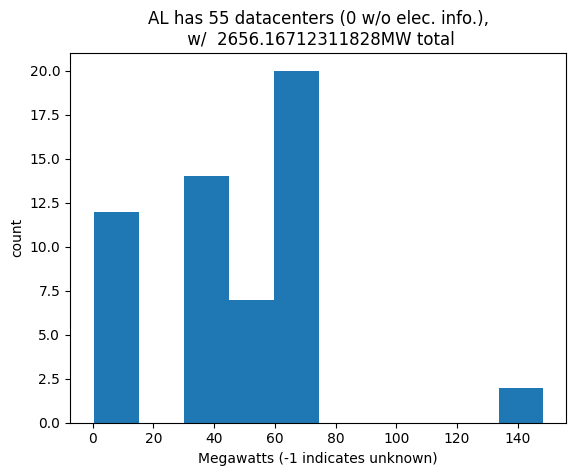

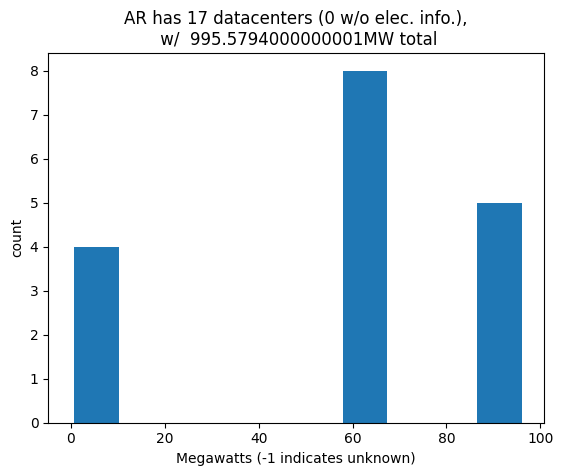

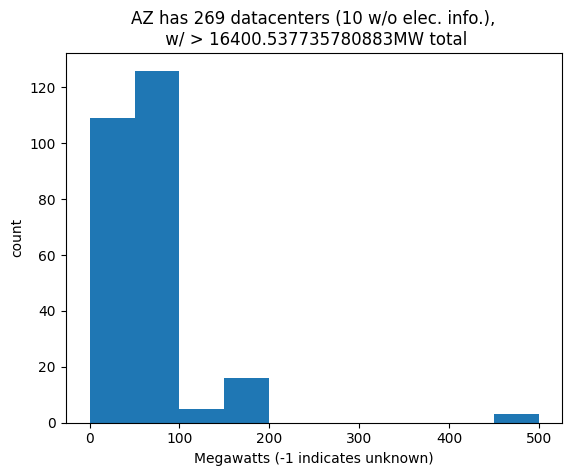

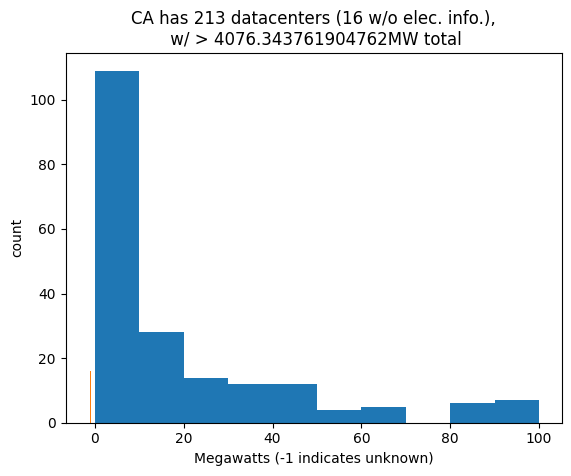

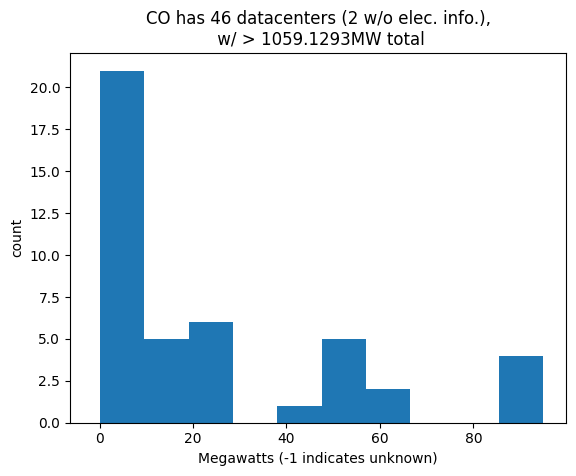

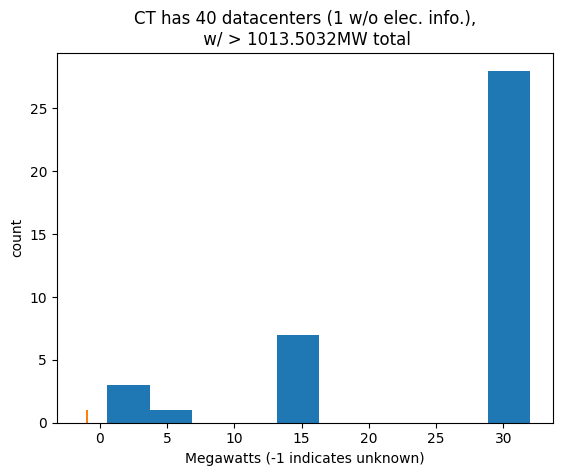

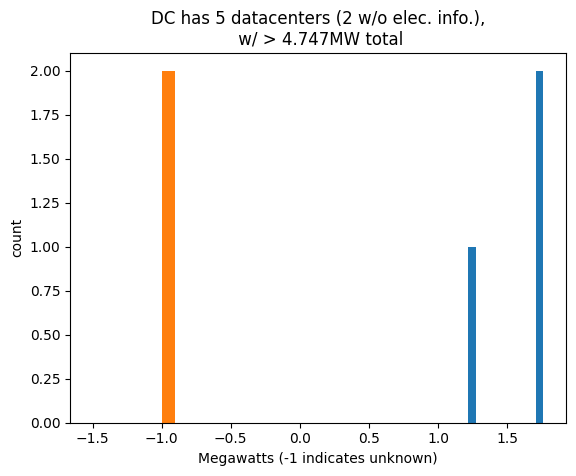

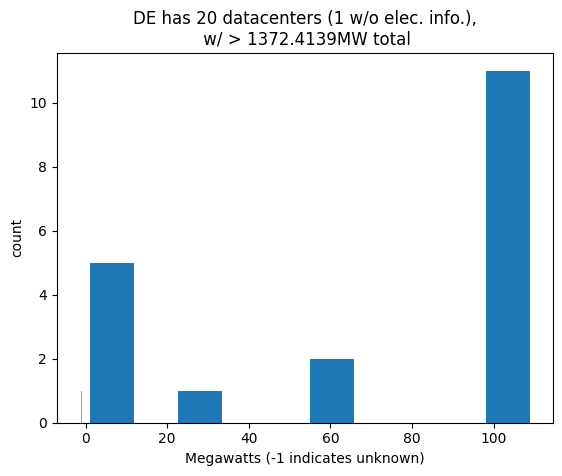

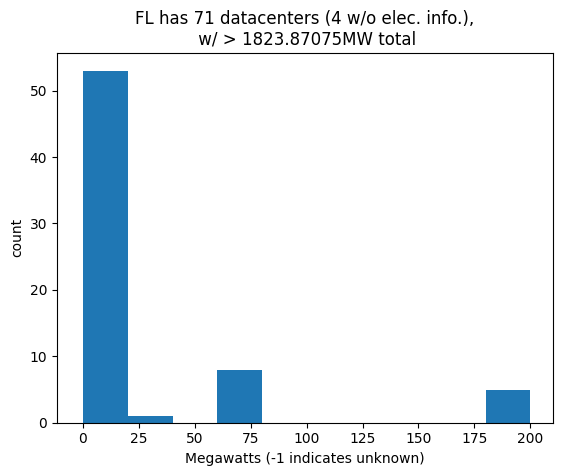

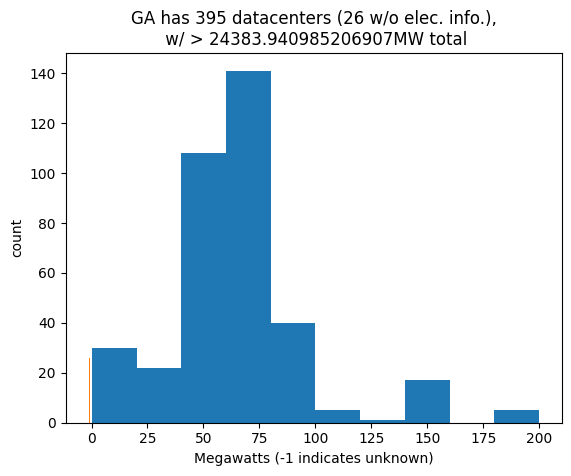

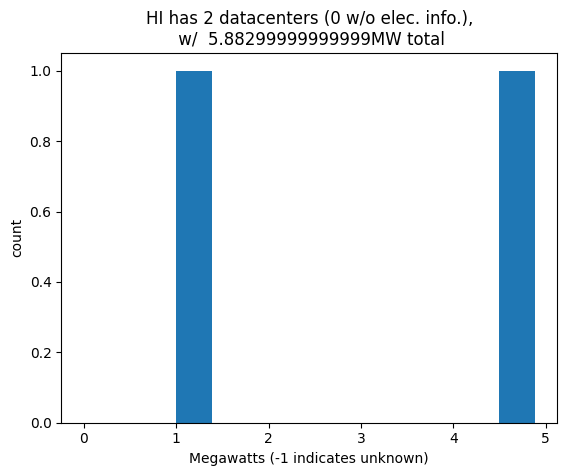

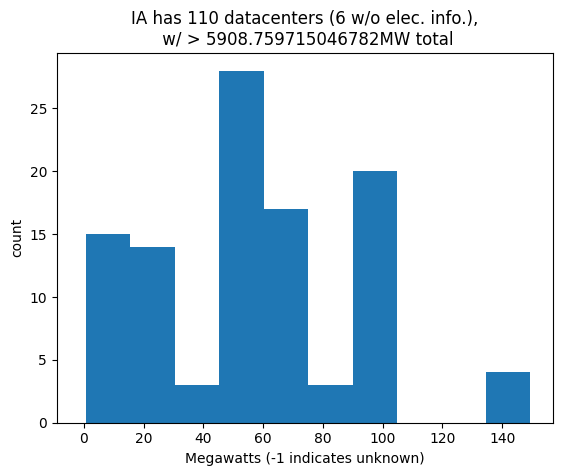

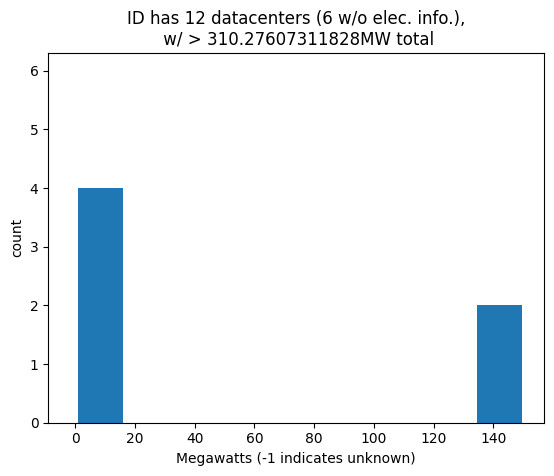

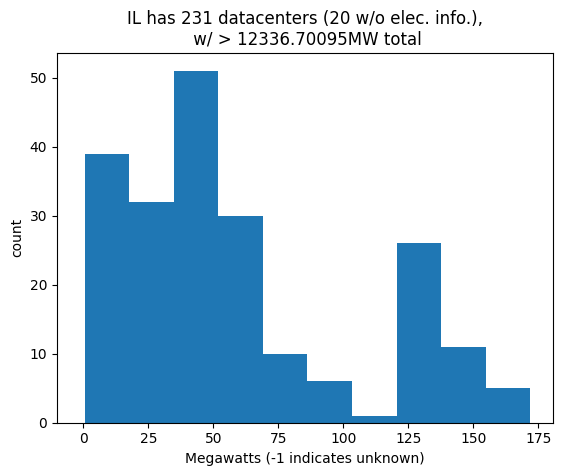

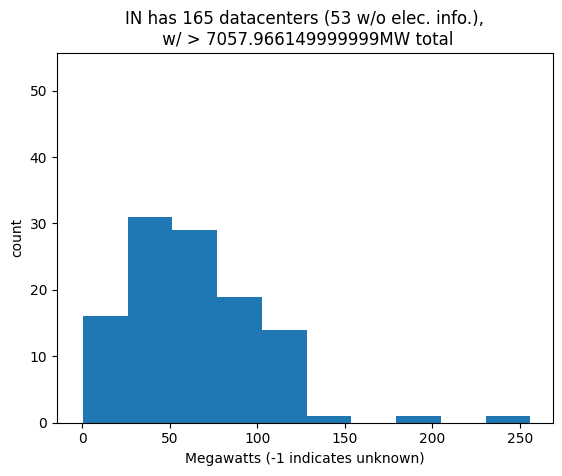

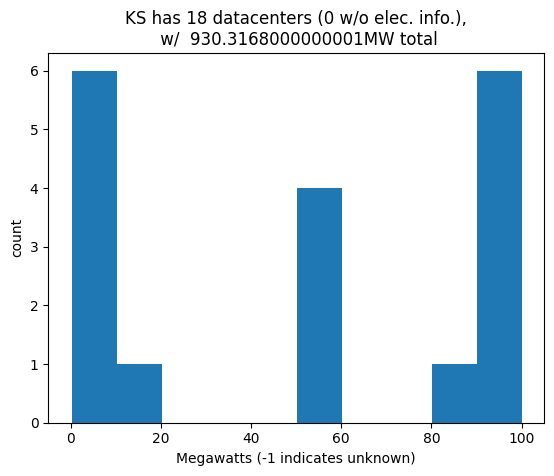

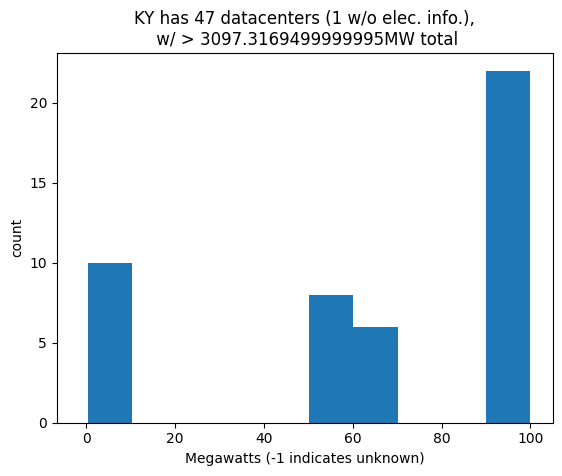

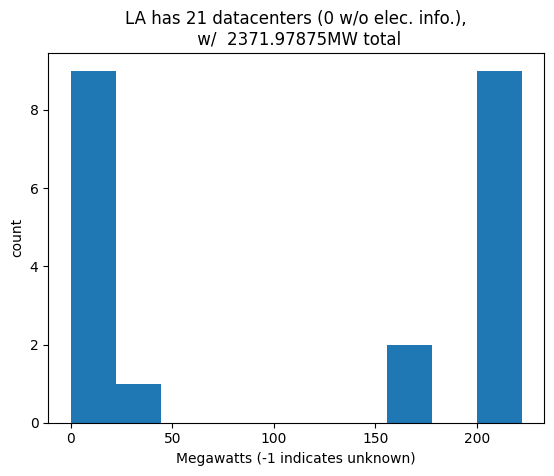

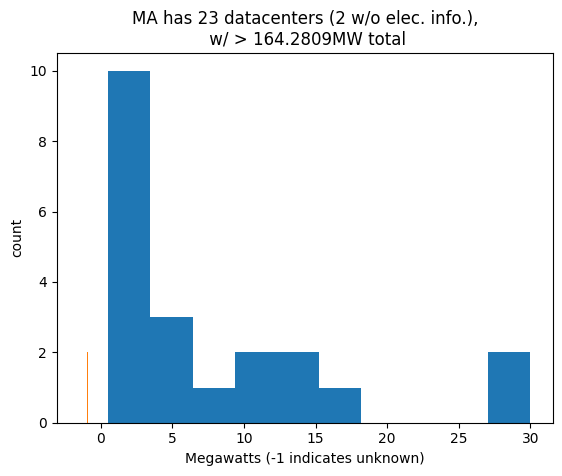

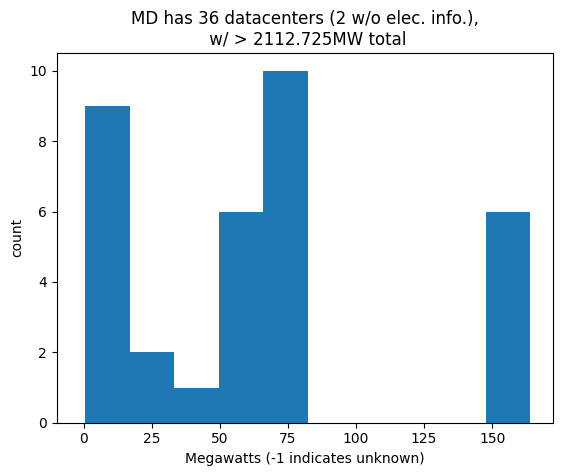

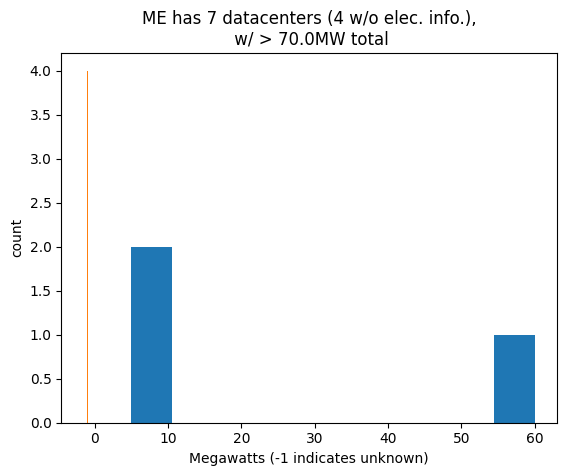

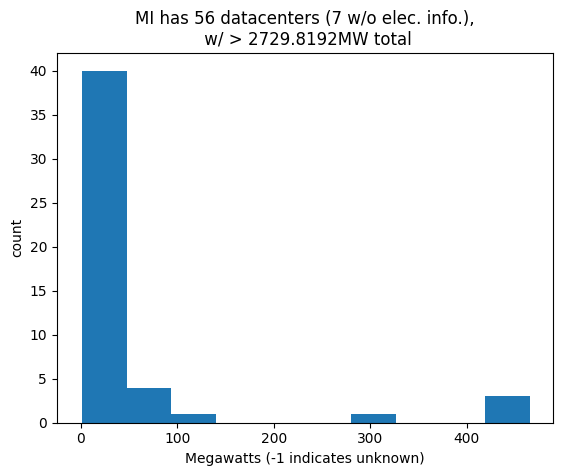

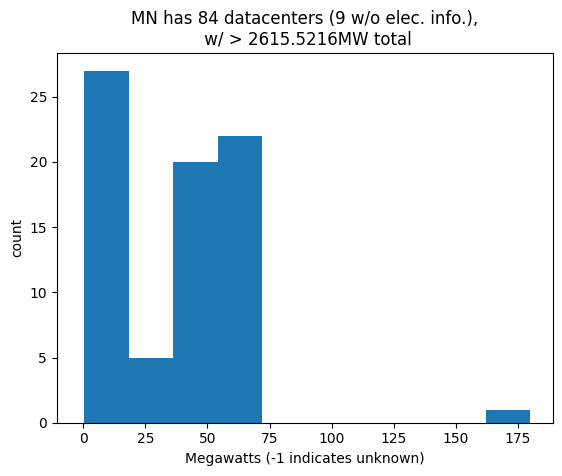

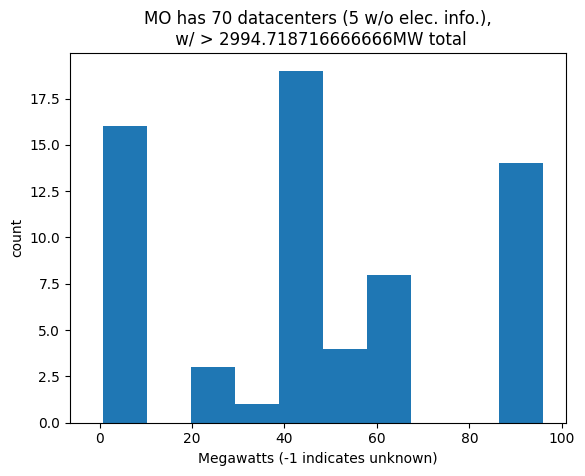

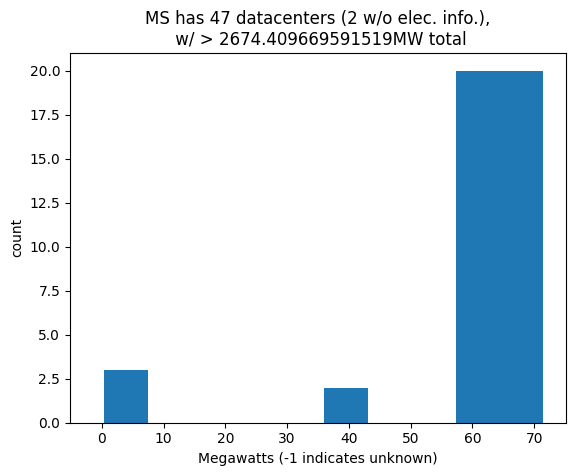

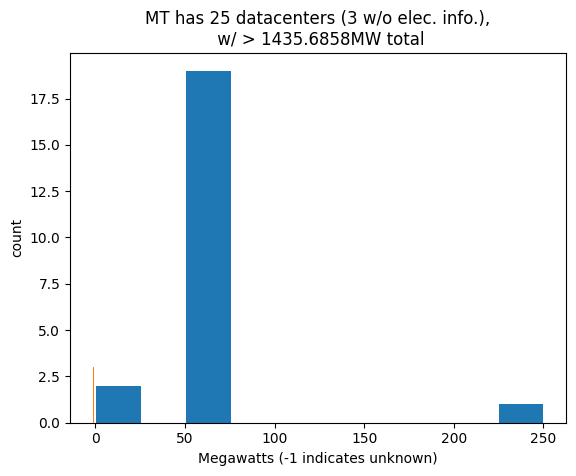

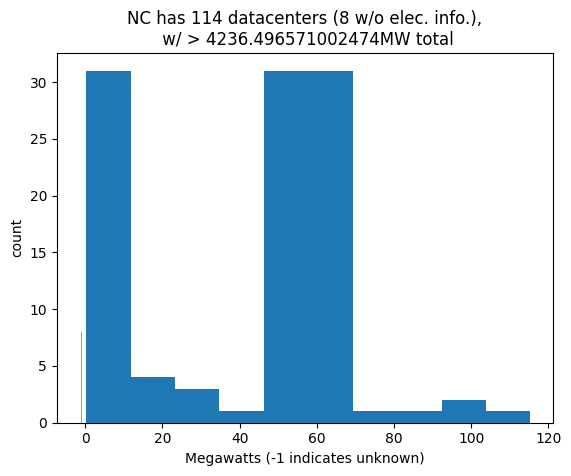

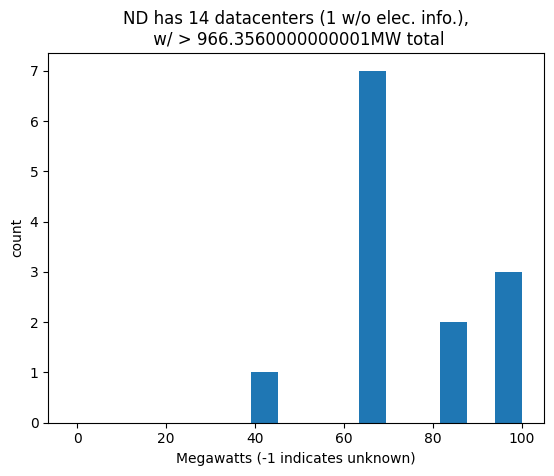

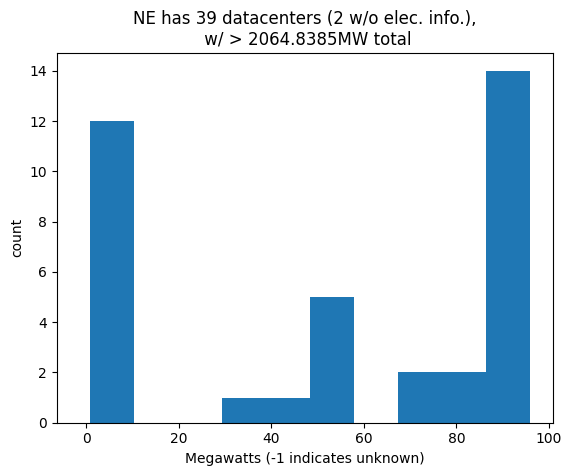

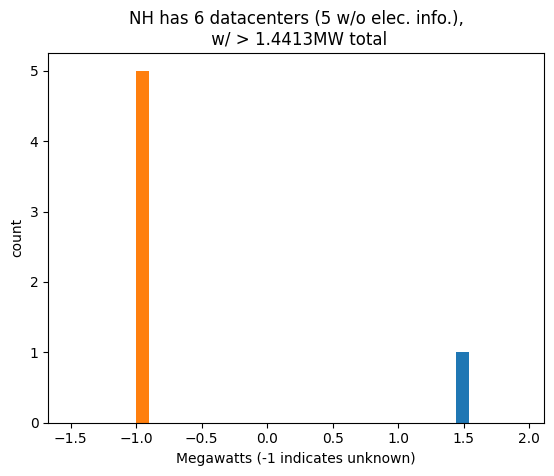

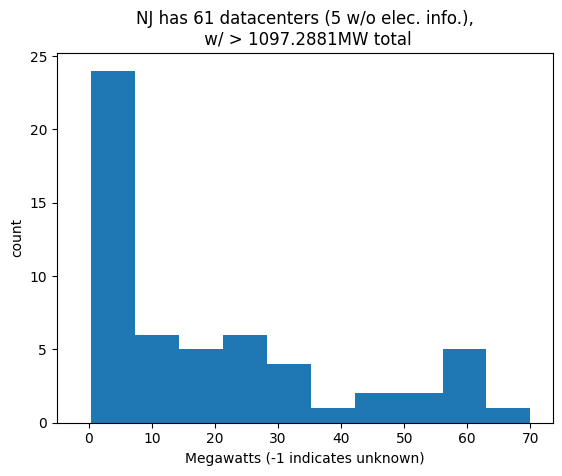

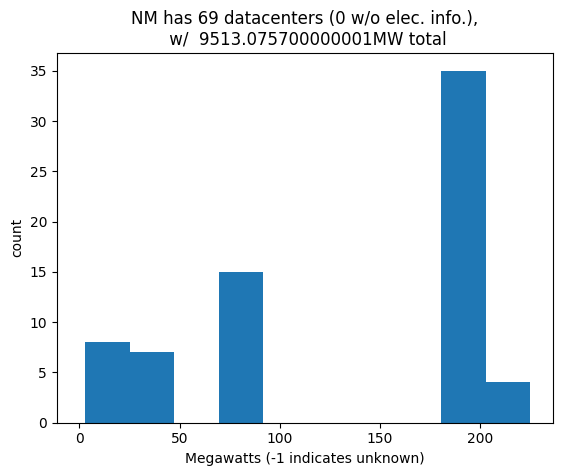

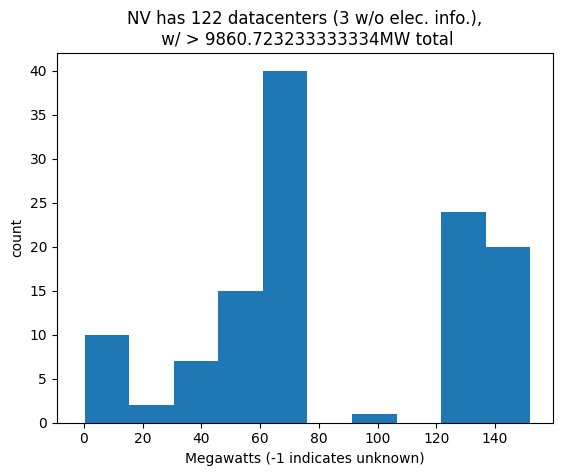

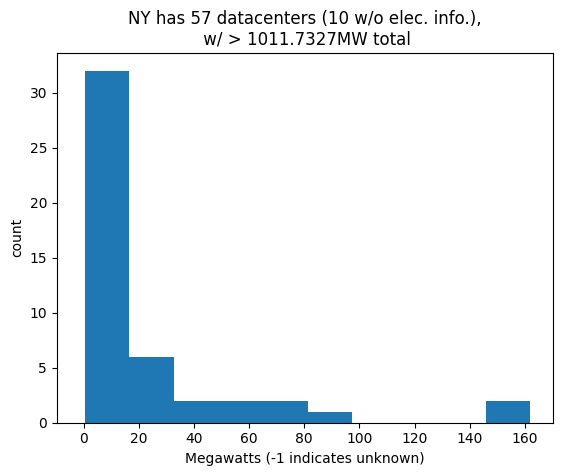

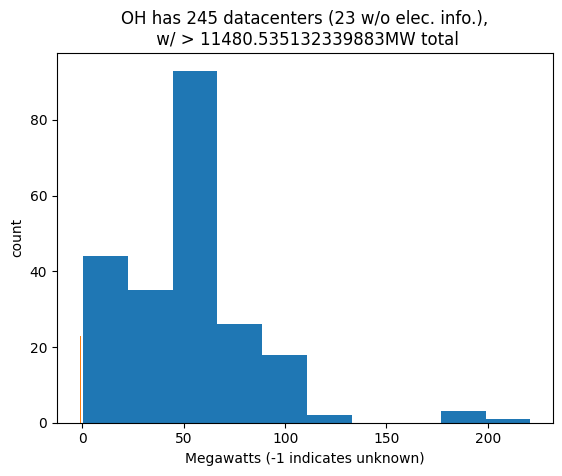

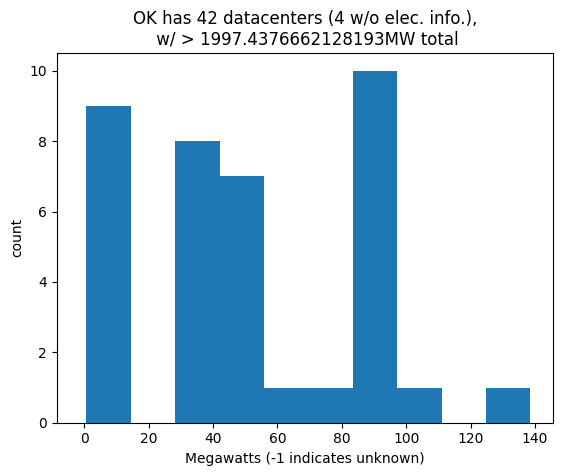

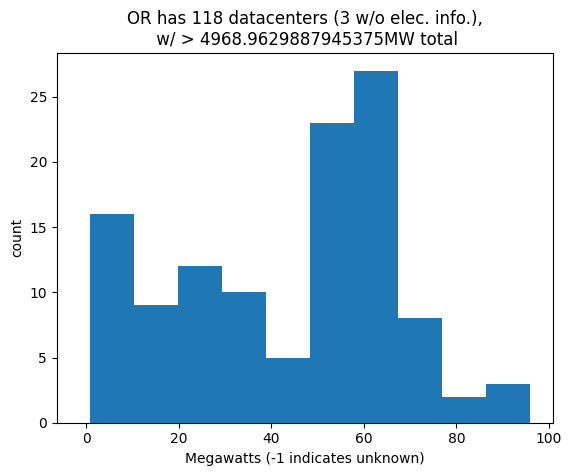

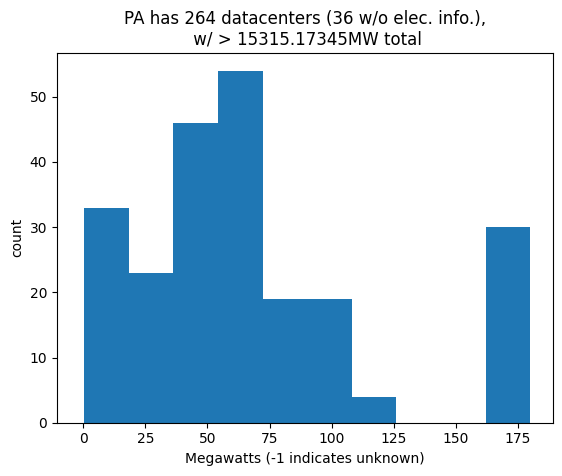

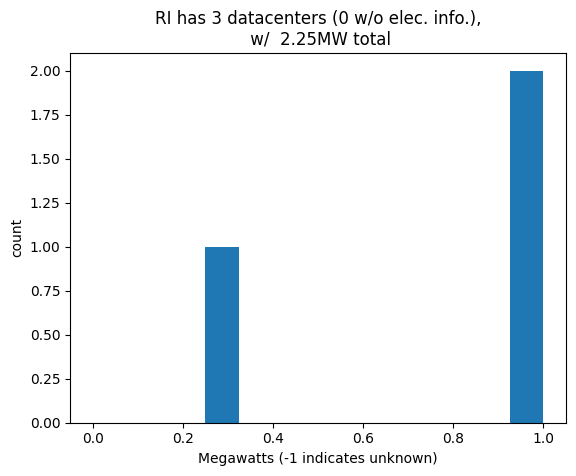

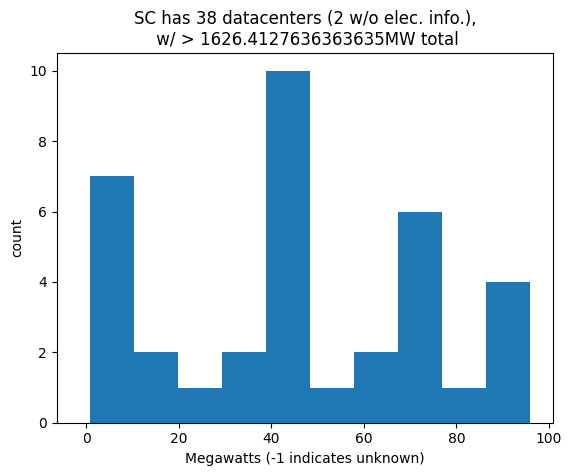

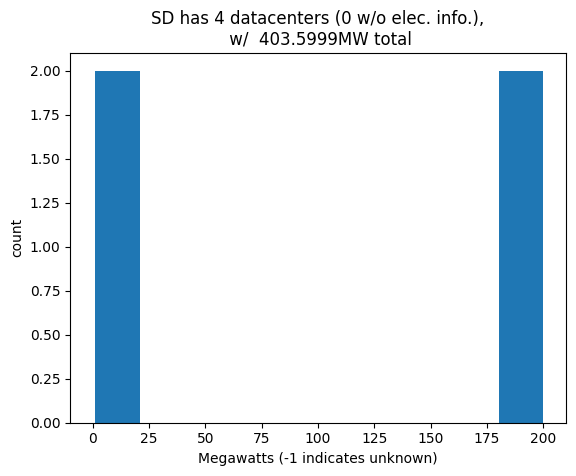

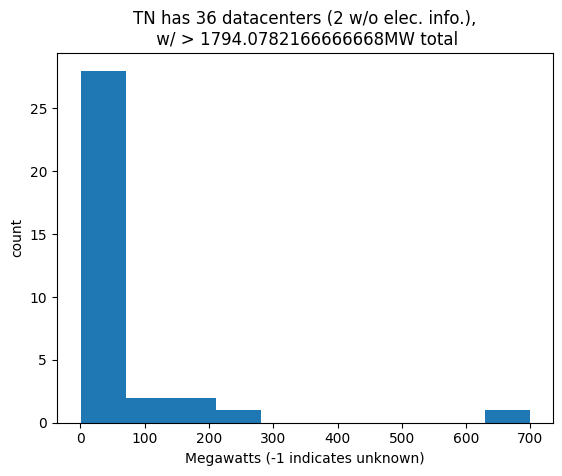

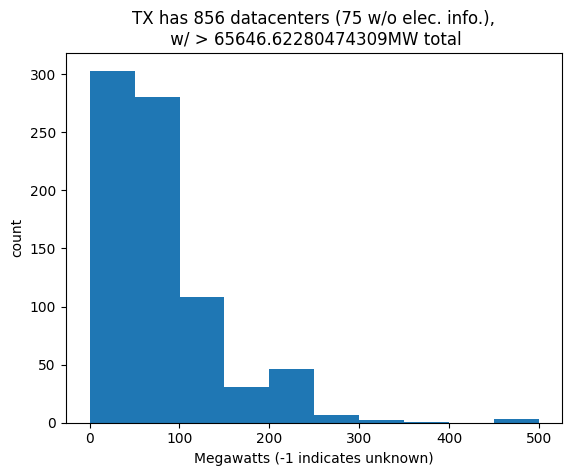

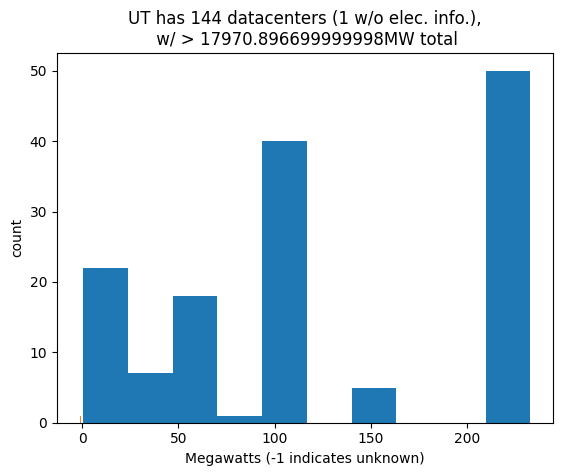

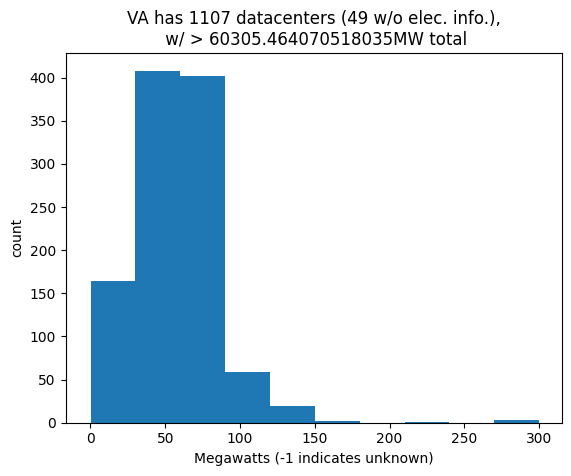

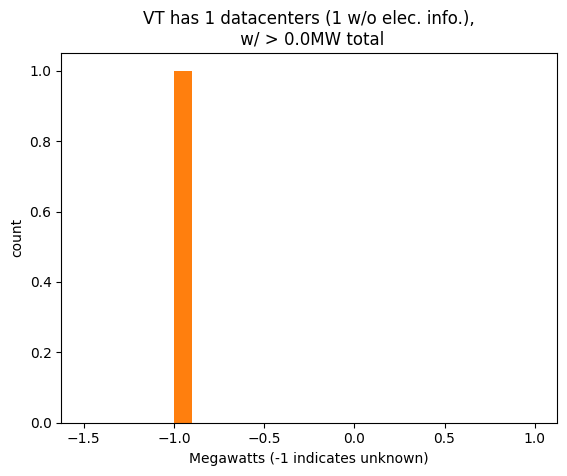

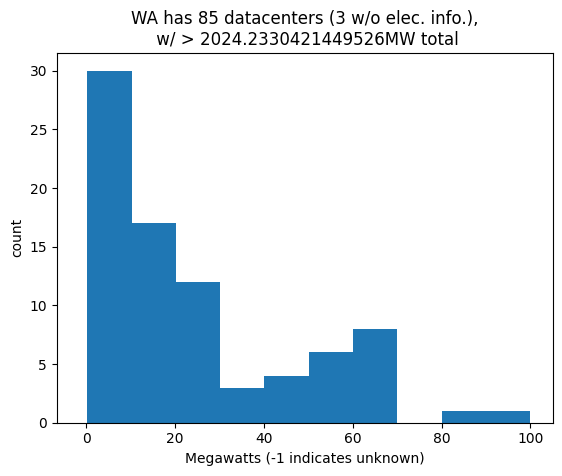

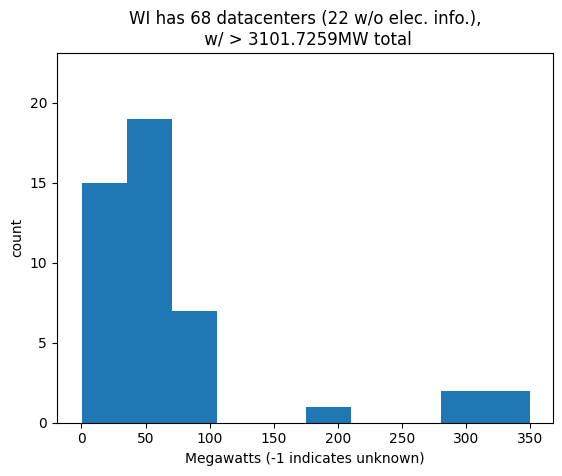

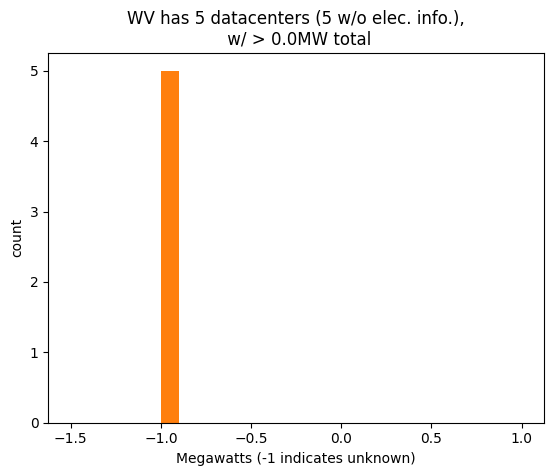

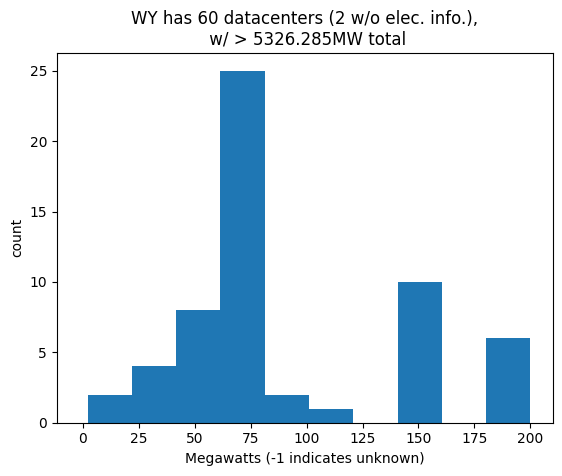

In [ ]:
# `STATE_CODE`
# `TOT_POWER_MW`
MW_by_state = {}
states = sorted(pd.unique(df["STATE_CODE"]))
for s in states:
    mw_df = df[df["STATE_CODE"] == s]["TOT_POWER_MW"]
    MW_by_state[s] = np.nansum(mw_df)
    mw = df[df["STATE_CODE"] == s]["TOT_POWER_MW"].fillna(-1)
    num_unknown = np.sum(mw == -1)
    plt.hist(mw[mw > 0])
    plt.hist(mw[mw < 0])
    plt.title(f"{s} has {len(mw)} datacenters ({num_unknown} w/o elec. info.),\n w/ {"" if num_unknown == 0 else ">"} {MW_by_state[s]}MW total")
    plt.xlabel("Megawatts (-1 indicates unknown)")
    plt.ylabel("count")
    plt.show()

In [ ]:
sorted(MW_by_state.items(), key=lambda x: -x[1])

In [ ]:
len(MW_by_state)